In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'C:/Users/ALISHBA JAWED/Desktop/Email Classification as Spam or Not Spam/emails.csv'
emails_df = pd.read_csv(file_path) #data loading

In [5]:
X = emails_df.drop(columns=['Email No.', 'Prediction']) #features
y = emails_df['Prediction'] #target - (spam or not spam)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data into 80%/20%

In [7]:
#for NAIVE BAYES Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_probabilities = nb_model.predict_proba(X_test)[:, 1] #for ROC later

In [8]:
#for SVM Model (State Vector Machine)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_probabilities = svm_model.predict_proba(X_test)[:, 1] #prob. for ROC

In [9]:
#Performance Metrics
def calculate_metrics(y_true, y_pred, y_probs, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}\n")
    
    return accuracy, precision, recall, f1, auc

In [10]:
nb_metrics = calculate_metrics(y_test, nb_predictions, nb_probabilities, "Naive Bayes")

Model: Naive Bayes
Accuracy: 0.9546
Precision: 0.8903
Recall: 0.9595
F1 Score: 0.9236
AUC: 0.9794



In [11]:
svm_metrics = calculate_metrics(y_test, svm_predictions, svm_probabilities, "SVM")

Model: SVM
Accuracy: 0.9594
Precision: 0.9205
Recall: 0.9392
F1 Score: 0.9298
AUC: 0.9844



In [12]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

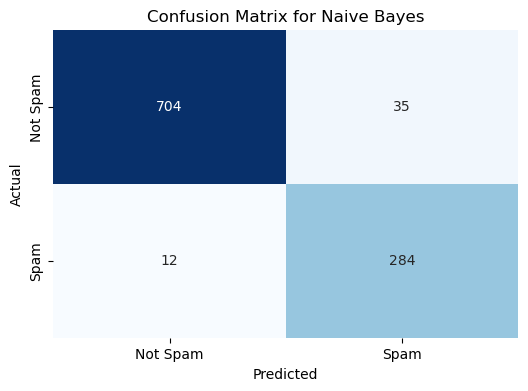

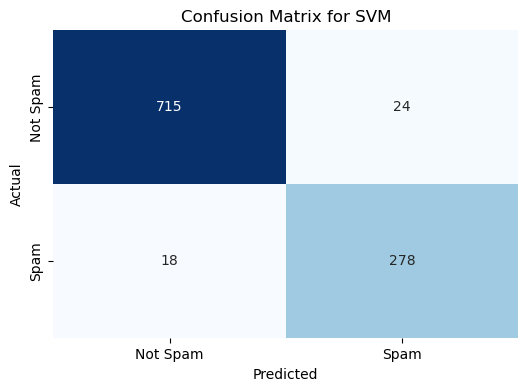

In [15]:
plot_confusion_matrix(y_test, nb_predictions, "Naive Bayes")
plot_confusion_matrix(y_test, svm_predictions, "SVM")

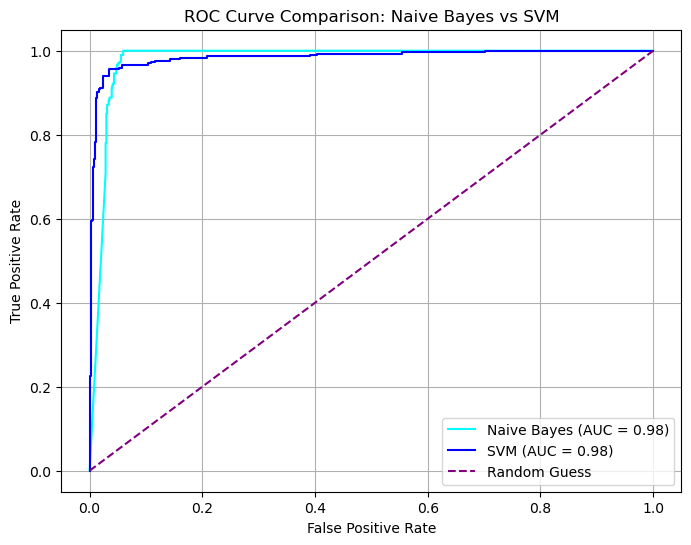

In [24]:
def plot_roc_curve(y_true, nb_probs, svm_probs):
    nb_fpr, nb_tpr, _ = roc_curve(y_true, nb_probs)
    svm_fpr, svm_tpr, _ = roc_curve(y_true, svm_probs)
    nb_auc = roc_auc_score(y_true, nb_probs)
    svm_auc = roc_auc_score(y_true, svm_probs)
    
#plot
    plt.figure(figsize=(8, 6))
    plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})', color='cyan')
    plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='purple', label='Random Guess')
    plt.title('ROC Curve Comparison: Naive Bayes vs SVM')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_roc_curve(y_test, nb_probabilities, svm_probabilities)

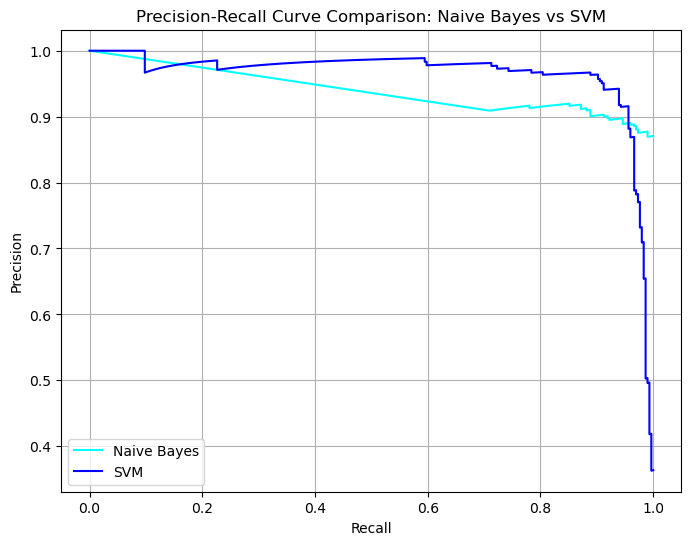

In [25]:
def plot_precision_recall_curve(y_true, nb_probs, svm_probs):
    nb_precision, nb_recall, _ = precision_recall_curve(y_true, nb_probs)
    svm_precision, svm_recall, _ = precision_recall_curve(y_true, svm_probs)
    
#plot
    plt.figure(figsize=(8, 6))
    plt.plot(nb_recall, nb_precision, label='Naive Bayes', color='cyan')
    plt.plot(svm_recall, svm_precision, label='SVM', color='blue')
    plt.title('Precision-Recall Curve Comparison: Naive Bayes vs SVM')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_precision_recall_curve(y_test, nb_probabilities, svm_probabilities)

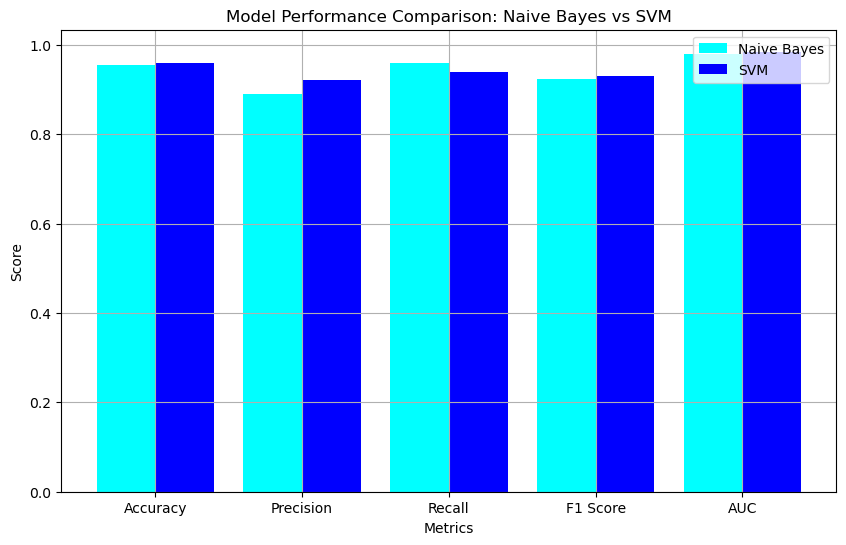


Model Comparison Summary:
         Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Naive Bayes  0.954589   0.890282  0.959459  0.923577  0.979355
1          SVM  0.959420   0.920530  0.939189  0.929766  0.984425


In [29]:
def plot_comparison_bar_chart(nb_metrics, svm_metrics):
    metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
    nb_values = [nb_metrics[0], nb_metrics[1], nb_metrics[2], nb_metrics[3], nb_metrics[4]]
    svm_values = [svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3], svm_metrics[4]]
    
    x = range(len(metrics_labels)) #labels positions
    
#plot
    plt.figure(figsize=(10, 6))
    plt.bar(x, nb_values, width=0.4, label='Naive Bayes', color='cyan', align='center')
    plt.bar([p + 0.4 for p in x], svm_values, width=0.4, label='SVM', color='blue', align='center')
    
    plt.xticks([p + 0.2 for p in x], metrics_labels)
    plt.title('Model Performance Comparison: Naive Bayes vs SVM')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_comparison_bar_chart(nb_metrics, svm_metrics)

#print a summary table also
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [nb_metrics[0], svm_metrics[0]],
    'Precision': [nb_metrics[1], svm_metrics[1]],
    'Recall': [nb_metrics[2], svm_metrics[2]],
    'F1 Score': [nb_metrics[3], svm_metrics[3]],
    'AUC': [nb_metrics[4], svm_metrics[4]]
})
print("\nModel Comparison Summary:")
print(comparison_df)

In [34]:
new_email_example = X_test.iloc[0] #test exaample
new_email_example_df = pd.DataFrame([new_email_example], columns=X_train.columns) #reshape to 2D array acc. to model expectations


nb_prediction = nb_model.predict(new_email_example_df)
nb_prediction_prob = nb_model.predict_proba(new_email_example_df)

svm_prediction = svm_model.predict(new_email_example_df)
svm_prediction_prob = svm_model.predict_proba(new_email_example_df)

if nb_prediction[0] == 1:
    print(f"Naive Bayes Model Prediction: Spam (Probability: {nb_prediction_prob[0][1]:.4f})")
else:
    print(f"Naive Bayes Model Prediction: Not Spam (Probability: {nb_prediction_prob[0][0]:.4f})")

if svm_prediction[0] == 1:
    print(f"SVM Model Prediction: Spam (Probability: {svm_prediction_prob[0][1]:.4f})")
else:
    print(f"SVM Model Prediction: Not Spam (Probability: {svm_prediction_prob[0][0]:.4f})")
    
#model output shows that models are confident in their predictions

Naive Bayes Model Prediction: Not Spam (Probability: 1.0000)
SVM Model Prediction: Not Spam (Probability: 0.9960)
